In [1]:
# Imports the various library for the lab
!pip install numpy==1.23

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import geopandas as gpd
import networkx as nx

import sys
print (f'current environment: {sys.prefix}')

if ox.__version__=='1.1.2':
    #prints OSMNx version 
    print (f'current osmnx version: {ox.__version__}') 
else:
    #recommends student to upgrade to newer osmnx version.
    print (f'current osmnx version: {ox.__version__}. student might need to upgrade to osmnx=1.1.2 for the notebook to work')
    
!pip install --upgrade shapely osmnx
!pip install mgwr
!pip install spglm

from mgwr.sel_bw import Sel_BW
from mgwr.gwr import GWR
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randInt
from sklearn.metrics import get_scorer_names
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from scipy import stats 

!pip install mgtwr
from mgtwr.model import GTWR

!pip install esda
import pysal as ps
import esda
from pysal.lib import weights
from esda.moran import Moran_Local
import statsmodels.api as sm

!pip install contextily
import contextily as ctx
import matplotlib.cm
import seaborn as sns

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler
!pip install lightgbm
import lightgbm as lgb

/Users/caiqinke/opt/anaconda3/envs/envGEOG0115/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


current environment: /Users/caiqinke/opt/anaconda3/envs/envGEOG0115
current osmnx version: 1.6.0. student might need to upgrade to osmnx=1.1.2 for the notebook to work


/Users/caiqinke/opt/anaconda3/envs/envGEOG0115/lib/python3.8/site-packages/libpysal/cg/alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
/Users/caiqinke/opt/anaconda3/envs/envGEOG0115/lib/python3.8/site-packages/libpysal/cg/alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
/Users/caiqin

AttributeError: module 'pandas.core.strings' has no attribute 'StringMethods'

In [2]:
#Load UK House Price Index data from 2012 to 2022 into a DataFrame
HPI_2012_2022 = pd.read_csv('/Users/caiqinke/Desktop/Dissertation datasets/UKHPI 2012-2022.csv')

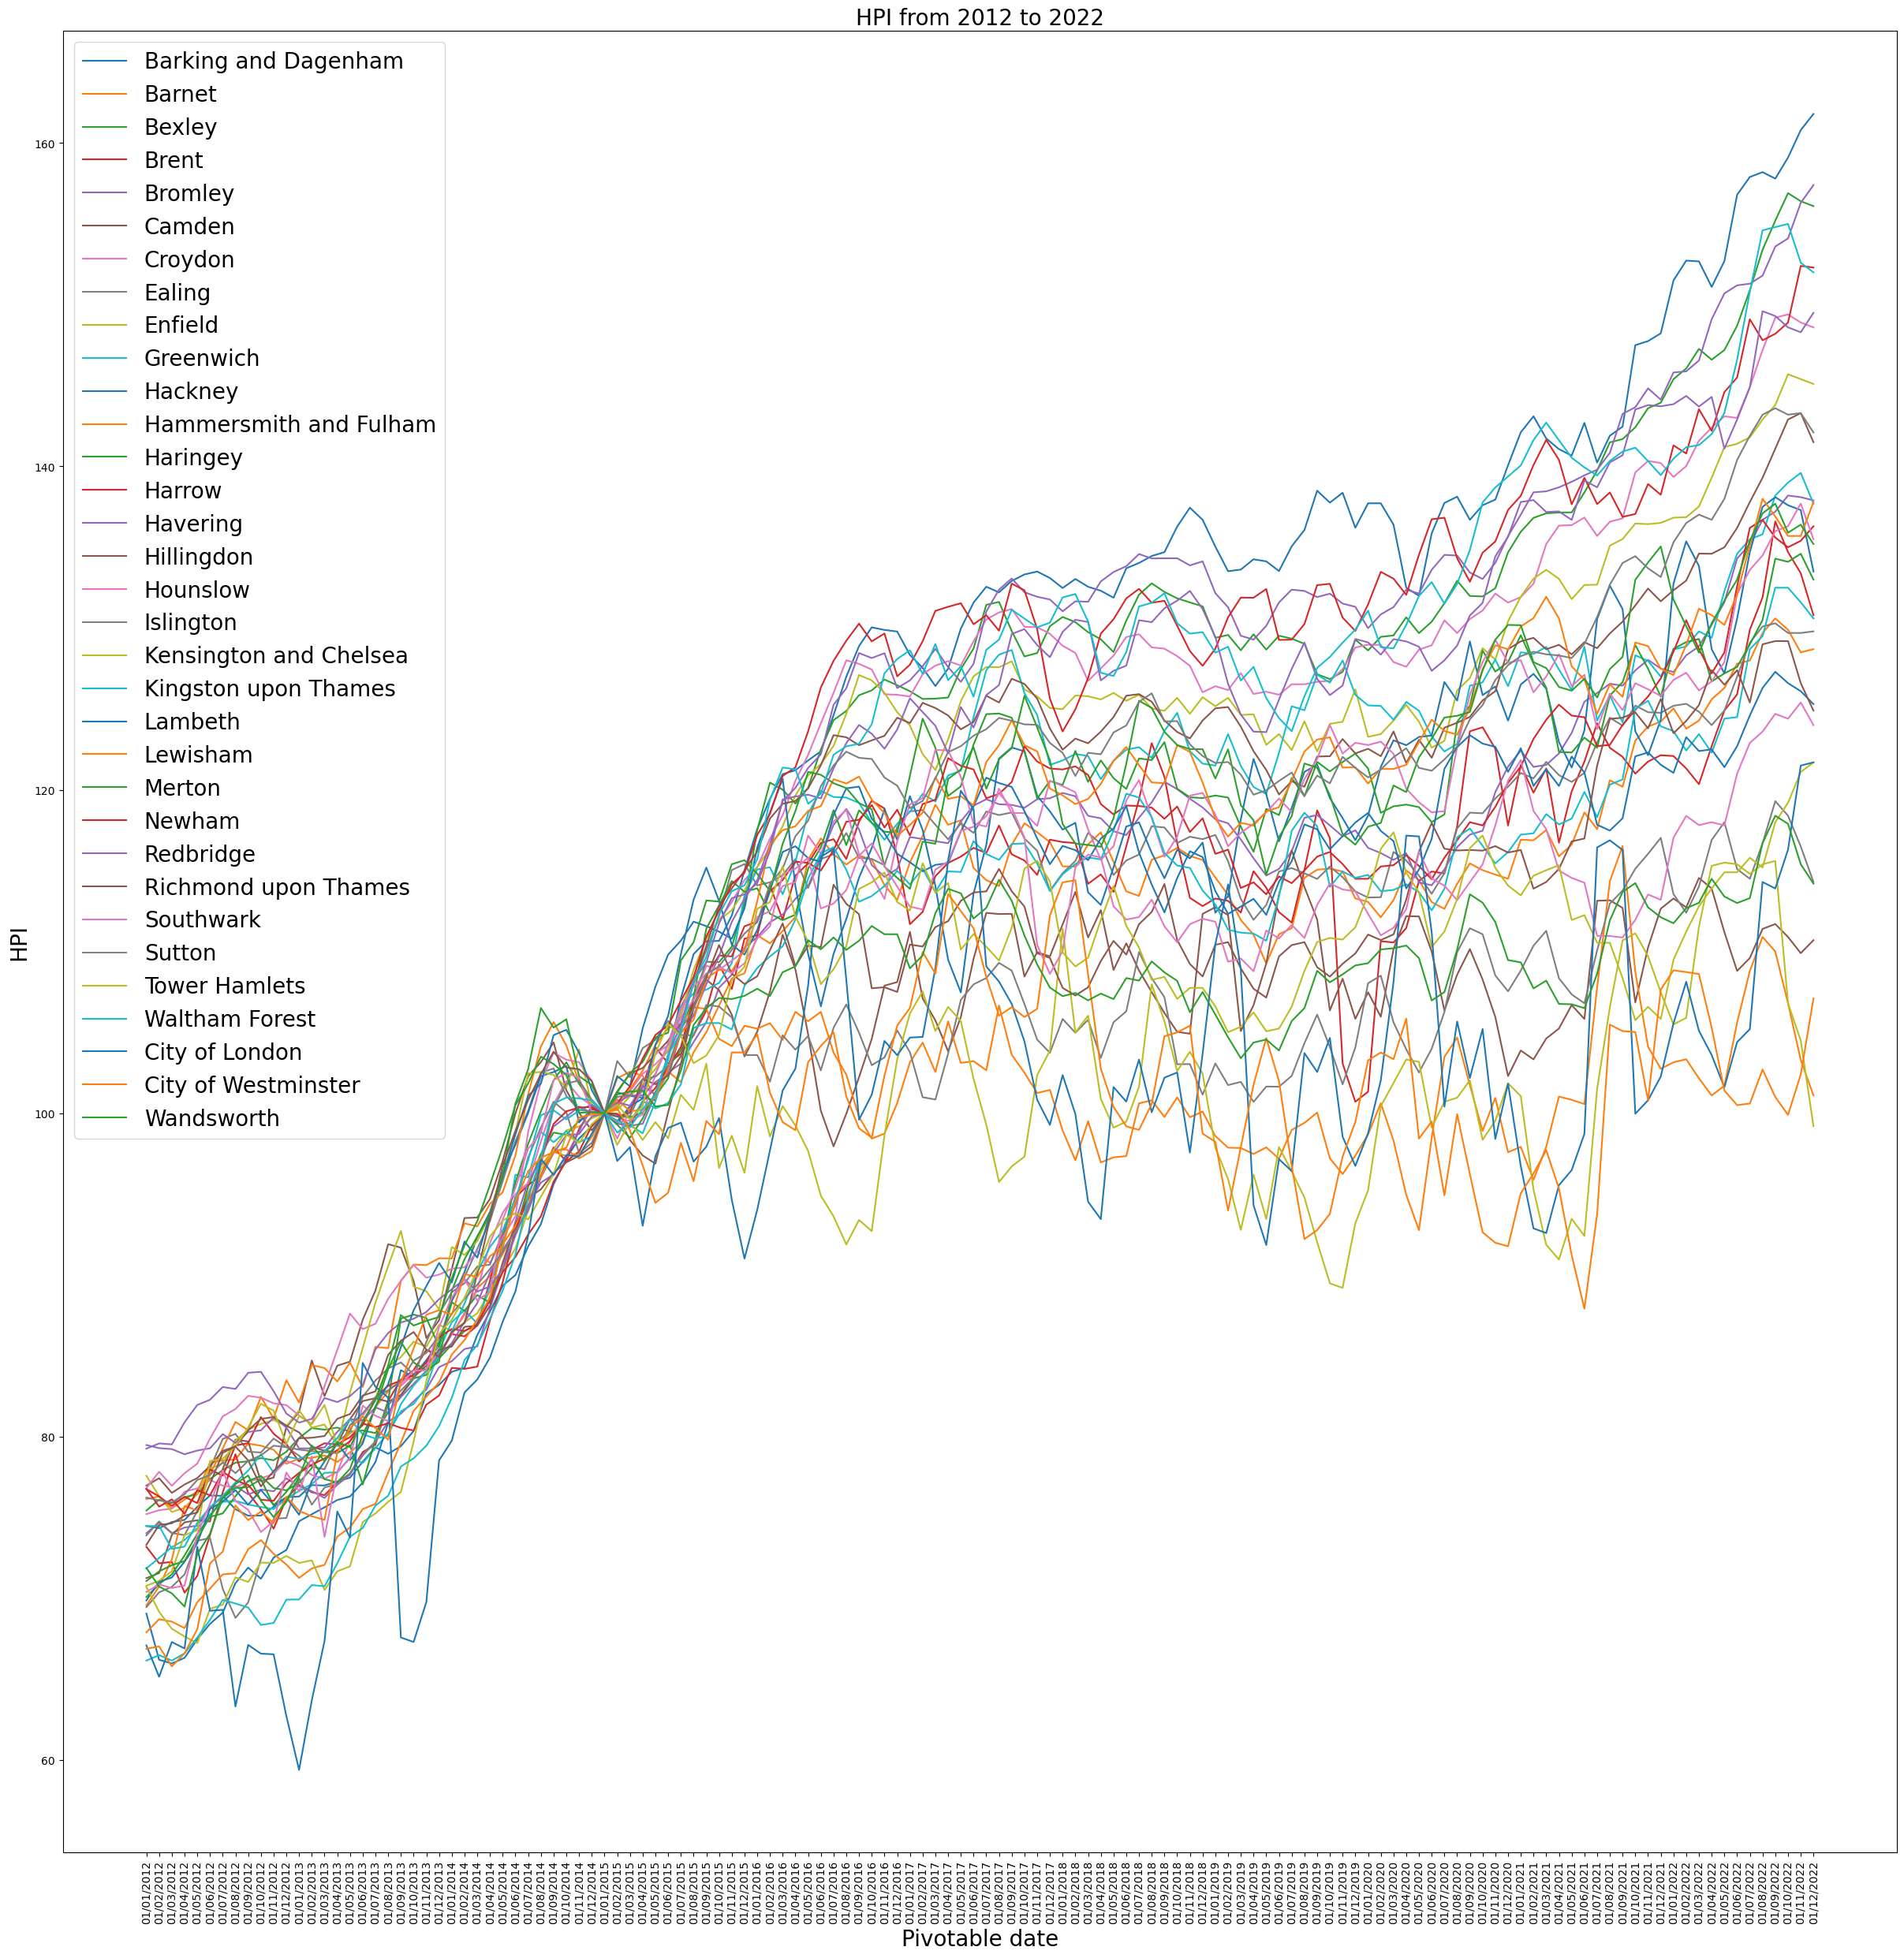

In [3]:
# Plot the House Price Index for different areas from 2012 to 2022
plt.figure(figsize = (30,30))

for area in HPI_2012_2022['Name'].unique():
    area_HPI_2012_2022 = HPI_2012_2022[HPI_2012_2022['Name'] == area]
    plt.plot(area_HPI_2012_2022['Pivotable date'], area_HPI_2012_2022['House price index All property types'], label = area)

plt.title('HPI from 2012 to 2022', fontsize = 20)
plt.xlabel('Pivotable date', fontsize = 20)
plt.ylabel('HPI', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.legend(fontsize = 20)

In [4]:
# Specify the path to the shapefile for London Boroughs
shapefile_path = '/Users/caiqinke/Desktop/UCL/GEOG0115_Data_Science_Report_coursework/ESRI/London_Borough_Excluding_MHW.shp'

# Read the shapefile into a GeoDataFrame using Geopandas
gdf = gpd.read_file(shapefile_path)

# Display the first few rows of the GeoDataFrame to inspect its structure
print(gdf.head())

                   NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F     None   
1               Croydon  E09000008   8649.441       0.000         F     None   
2               Bromley  E09000006  15013.487       0.000         F     None   
3              Hounslow  E09000018   5658.541      60.755         F     None   
4                Ealing  E09000009   5554.428       0.000         F     None   

  SUB_2006                                           geometry  
0     None  POLYGON ((516401.600 160201.800, 516407.300 16...  
1     None  POLYGON ((535009.200 159504.700, 535005.500 15...  
2     None  POLYGON ((540373.600 157530.400, 540361.200 15...  
3     None  POLYGON ((521975.800 178100.000, 521967.700 17...  
4     None  POLYGON ((510253.500 182881.600, 510249.900 18...  


In [5]:
# Re-project the GeoDataFrame to EPSG4326 coordinate system
gdf = gdf.to_crs(epsg=4326)

# Count the number of schools within each district using OSMnx
gdf['num_schools'] = gdf.geometry.apply(lambda polygon: len(ox.geometries_from_polygon(polygon, tags={'amenity': 'school'})))

# Query and count the number of historic sites within each district using OSMnx
gdf['num_historics'] = gdf.geometry.apply(lambda polygon: len(ox.geometries_from_polygon(polygon, tags={'historic': True})))

# Query the schools within each district and count the number of schools
gdf['num_stations'] = gdf.geometry.apply(lambda polygon: len(ox.geometries_from_polygon(polygon, tags={'railway': 'station'})))

# Display the GeoDataFrame with district names and the respective count of schools
print(gdf)

/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/2403047658.py:5: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf['num_schools'] = gdf.geometry.apply(lambda polygon: len(ox.geometries_from_polygon(polygon, tags={'amenity': 'school'})))
/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/2403047658.py:5: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf['num_schools'] = gdf.geometry.apply(lambda polygon: len(ox.geometries_from_polygon(polygon, tags={'amenity': 'school'})))
/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel

/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/2403047658.py:5: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf['num_schools'] = gdf.geometry.apply(lambda polygon: len(ox.geometries_from_polygon(polygon, tags={'amenity': 'school'})))
/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/2403047658.py:5: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf['num_schools'] = gdf.geometry.apply(lambda polygon: len(ox.geometries_from_polygon(polygon, tags={'amenity': 'school'})))
/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel

/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/2403047658.py:8: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf['num_historics'] = gdf.geometry.apply(lambda polygon: len(ox.geometries_from_polygon(polygon, tags={'historic': True})))
/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/2403047658.py:8: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf['num_historics'] = gdf.geometry.apply(lambda polygon: len(ox.geometries_from_polygon(polygon, tags={'historic': True})))
/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3

/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/2403047658.py:8: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf['num_historics'] = gdf.geometry.apply(lambda polygon: len(ox.geometries_from_polygon(polygon, tags={'historic': True})))
/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/2403047658.py:8: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf['num_historics'] = gdf.geometry.apply(lambda polygon: len(ox.geometries_from_polygon(polygon, tags={'historic': True})))
/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3

/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/2403047658.py:11: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf['num_stations'] = gdf.geometry.apply(lambda polygon: len(ox.geometries_from_polygon(polygon, tags={'railway': 'station'})))
/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/2403047658.py:11: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf['num_stations'] = gdf.geometry.apply(lambda polygon: len(ox.geometries_from_polygon(polygon, tags={'railway': 'station'})))
/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipy

/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/2403047658.py:11: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf['num_stations'] = gdf.geometry.apply(lambda polygon: len(ox.geometries_from_polygon(polygon, tags={'railway': 'station'})))
/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/2403047658.py:11: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf['num_stations'] = gdf.geometry.apply(lambda polygon: len(ox.geometries_from_polygon(polygon, tags={'railway': 'station'})))
/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipy

                      NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  \
0     Kingston upon Thames  E09000021   3726.117       0.000         F   
1                  Croydon  E09000008   8649.441       0.000         F   
2                  Bromley  E09000006  15013.487       0.000         F   
3                 Hounslow  E09000018   5658.541      60.755         F   
4                   Ealing  E09000009   5554.428       0.000         F   
5                 Havering  E09000016  11445.735     210.763         F   
6               Hillingdon  E09000017  11570.063       0.000         F   
7                   Harrow  E09000015   5046.330       0.000         F   
8                    Brent  E09000005   4323.270       0.000         F   
9                   Barnet  E09000003   8674.837       0.000         F   
10                 Lambeth  E09000022   2724.940      43.927         T   
11               Southwark  E09000028   2991.340     105.139         T   
12                Lewisham  E09000023 

<AxesSubplot: >

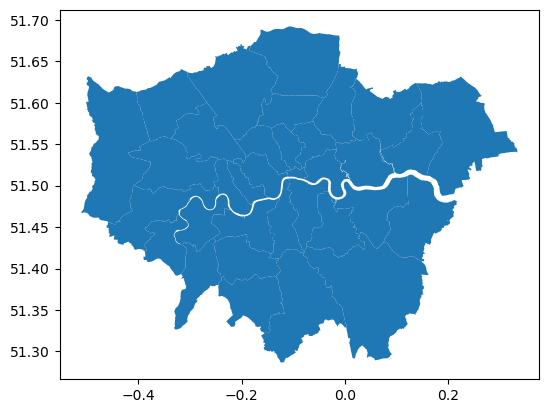

In [6]:
# Plot the base map
map_df = gdf[['NAME','geometry']]
map_df.plot()

In [9]:
# Load dataset
df_hpi = pd.read_csv('/Users/caiqinke/Desktop/ukhpi-comparison-all-hpi-2019-to-2022.csv')

In [10]:
# Convert 'period' column to datetime format
df_hpi['Period'] = pd.to_datetime(df_hpi['Period'])

# Extract the year from the "Date" column and create a new "Year" column
df_hpi['Year'] = df_hpi['Period'].dt.year

# Filter data for the year 2022
df_hpi_2022 = df_hpi[df_hpi['Period'].dt.year == 2022]

In [66]:
# Group the data by "Year" and "Region GSS code" and calculate the mean HPI for each combination
average_hpi_2022 = df_hpi_2022.groupby(['Year', 'Region GSS code'])['House price index All property types'].mean().reset_index()

# Merge the mean HPI with the original DataFrame based on "Year" and "Region GSS code"
df_merged_hpi = pd.merge(df_hpi_2022, average_hpi_2022, on=['Year', 'Region GSS code'], suffixes=('', '_average'))

# Group the data by "Name", "Region GSS code", "Year", and "House price index All property types_average" 
# and calculate the sum of "Sales volume" for each group
df_sum_hpi = df_merged_hpi.groupby(['Name', 'Region GSS code', 'Year', 'House price index All property types_average'])['Sales volume'].sum().reset_index()

# Display the result
print(df_sum_hpi)

                      Name Region GSS code  Year  \
0     Barking and Dagenham       E09000002  2022   
1                   Barnet       E09000003  2022   
2                   Bexley       E09000004  2022   
3                    Brent       E09000005  2022   
4                  Bromley       E09000006  2022   
5                   Camden       E09000007  2022   
6           City of London       E09000001  2022   
7      City of Westminster       E09000033  2022   
8                  Croydon       E09000008  2022   
9                   Ealing       E09000009  2022   
10                 Enfield       E09000010  2022   
11               Greenwich       E09000011  2022   
12                 Hackney       E09000012  2022   
13  Hammersmith and Fulham       E09000013  2022   
14                Haringey       E09000014  2022   
15                  Harrow       E09000015  2022   
16                Havering       E09000016  2022   
17              Hillingdon       E09000017  2022   
18          

In [67]:
# Rename a single column
new_column_name = 'GSS_CODE'
old_column_name = 'Region GSS code'
df_sum_hpi.rename(columns={old_column_name: new_column_name}, inplace=True)

# Merge
df_merged_hpi_shp = pd.merge(gdf, df_sum_hpi, on='GSS_CODE', suffixes=('', '_average'))

/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/4253086594.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):


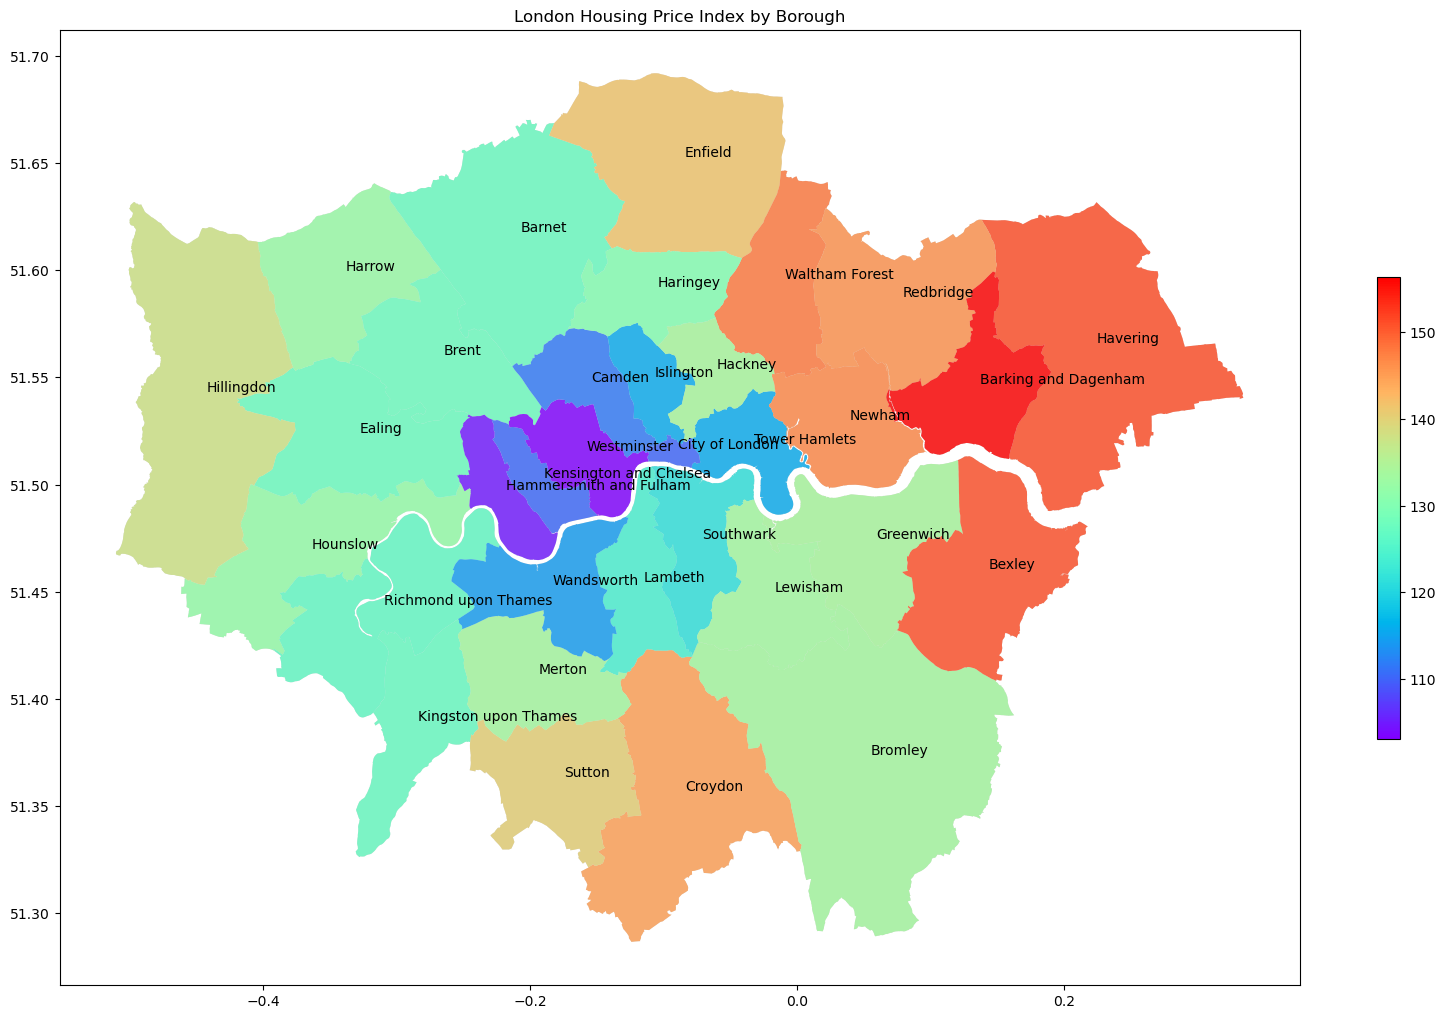

In [68]:
# Create a figure and axis object with specified dimensions
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the GeoDataFrame containing the base map (light grey color)
gdf.plot(ax=ax, color='lightgrey')

# Plot the data from df_merged_hpi_shp overlaying it on the base map
df_merged_hpi_shp.plot(column='House price index All property types_average', ax=ax, cmap='rainbow',
                       legend=True, legend_kwds={'shrink': 0.3},
                       markersize=10, alpha=0.8)

# Set the title of the plot
ax.set_title('London Housing Price Index by Borough')

# Annotate each borough with its name
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points')

# Display the plot
plt.show()

In [69]:
#Load the green cover borough dataset in 2018
df_green = pd.read_csv('/Users/caiqinke/Desktop/Green_cover_borough_2018.csv')

#Load the London house price in 2022
df_2022_price = pd.read_csv('/Users/caiqinke/Desktop/Dissertation datasets/2022houseprice.csv')

In [70]:
# Drop rows with missing data in the 'postcode' column
df_2022_price = df_2022_price.dropna(subset=['postcode'])

# Group the data by "district" and calculate the mean of "price_paid"
average_price_2022 = df_2022_price.groupby(['district'])['price_paid'].mean().reset_index()

# Remove whitespace from the start and end of all string values in all columns
average_price_2022 = average_price_2022.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Display the result
print(average_price_2022)

                  district    price_paid
0     BARKING AND DAGENHAM  4.470033e+05
1                   BARNET  8.125678e+05
2                   BEXLEY  4.936524e+05
3                    BRENT  8.447822e+05
4                  BROMLEY  6.028303e+05
5                   CAMDEN  1.663547e+06
6           CITY OF LONDON  2.598131e+06
7      CITY OF WESTMINSTER  2.605058e+06
8                  CROYDON  5.112401e+05
9                   EALING  7.042291e+05
10                 ENFIELD  5.596356e+05
11               GREENWICH  5.763835e+05
12                 HACKNEY  8.469916e+05
13  HAMMERSMITH AND FULHAM  1.042785e+06
14                HARINGEY  7.676682e+05
15                  HARROW  5.962965e+05
16                HAVERING  4.764538e+05
17              HILLINGDON  6.918956e+05
18                HOUNSLOW  6.333506e+05
19               ISLINGTON  1.091396e+06
20  KENSINGTON AND CHELSEA  2.769008e+06
21    KINGSTON UPON THAMES  7.067825e+05
22                 LAMBETH  7.162662e+05
23              

In [71]:
# Create a dictionary to map district names to their corresponding codes
code_name_mapping = {
    'CITY OF LONDON':'E09000001',
    'BARKING AND DAGENHAM':'E09000002',
    'BARNET':'E09000003',
    'BEXLEY':'E09000004',
    'BRENT':'E09000005',
    'BROMLEY':'E09000006',
    'CAMDEN':'E09000007',
    'CROYDON':'E09000008',
    'EALING':'E09000009',
    'ENFIELD':'E09000010',
    'GREENWICH':'E09000011',
    'HACKNEY':'E09000012',
    'HAMMERSMITH AND FULHAM':'E09000013',
    'HARINGEY':'E09000014',
    'HARROW':'E09000015',
    'HAVERING':'E09000016',
    'HILLINGDON':'E09000017',
    'HOUNSLOW':'E09000018',
    'ISLINGTON':'E09000019',
    'KENSINGTON AND CHELSEA':'E09000020',
    'KINGSTON UPON THAMES':'E09000021',
    'LAMBETH':'E09000022',
    'LEWISHAM':'E09000023',
    'MERTON':'E09000024',
    'NEWHAM':'E09000025',
    'REDBRIDGE':'E09000026',
    'RICHMOND UPON THAMES':'E09000027',
    'SOUTHWARK':'E09000028',
    'SUTTON':'E09000029',
    'TOWER HAMLETS':'E09000030',
    'WALTHAM FOREST':'E09000031',
    'WANDSWORTH':'E09000032',
    'CITY OF WESTMINSTER':'E09000033',
}

# Use the .map() method to create a new 'Code' column by mapping 'district' to its corresponding code
average_price_2022['Code'] = average_price_2022['district'].map(code_name_mapping)

# Print the updated DataFrame with the new 'Code' column
print(average_price_2022)

                  district    price_paid       Code
0     BARKING AND DAGENHAM  4.470033e+05  E09000002
1                   BARNET  8.125678e+05  E09000003
2                   BEXLEY  4.936524e+05  E09000004
3                    BRENT  8.447822e+05  E09000005
4                  BROMLEY  6.028303e+05  E09000006
5                   CAMDEN  1.663547e+06  E09000007
6           CITY OF LONDON  2.598131e+06  E09000001
7      CITY OF WESTMINSTER  2.605058e+06  E09000033
8                  CROYDON  5.112401e+05  E09000008
9                   EALING  7.042291e+05  E09000009
10                 ENFIELD  5.596356e+05  E09000010
11               GREENWICH  5.763835e+05  E09000011
12                 HACKNEY  8.469916e+05  E09000012
13  HAMMERSMITH AND FULHAM  1.042785e+06  E09000013
14                HARINGEY  7.676682e+05  E09000014
15                  HARROW  5.962965e+05  E09000015
16                HAVERING  4.764538e+05  E09000016
17              HILLINGDON  6.918956e+05  E09000017
18          

In [72]:
# Load the green cover borough dataset in 2018
df_GCSEs = pd.read_csv('/Users/caiqinke/Desktop/GCSEs.csv')

# Remove leading and trailing whitespace from all string values in the DataFrame
df_GCSEs_cleaned = df_GCSEs.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [73]:
# Choose the key factors
df_GCSEs_high = df_GCSEs[['Code', 'Area', 'Average Attainment 8 score per pupil']]

In [74]:
# Convert non-numeric strings in 'Average Attainment 8 score per pupil' to NaN
df_GCSEs_high['Average Attainment 8 score per pupil'] = pd.to_numeric(df_GCSEs_high['Average Attainment 8 score per pupil'], errors='coerce')

# Filter rows based on specific 'Code' values
selected_codes = ['E09000033', 'E09000022', 'E09000028', 'E09000030', 'E09000012', 'E09000019', 'E09000007']
selected_rows = df_GCSEs_high[df_GCSEs_high['Code'].isin(selected_codes)]

# Calculate the average of 'Average Attainment 8 score per pupil' for the filtered rows
average_attainment_8 = selected_rows['Average Attainment 8 score per pupil'].mean()

# Update the 'Average Attainment 8 score per pupil' for the row with 'Code' as 'E09000001'
df_GCSEs_high.loc[df_GCSEs_high['Code'] == 'E09000001', 'Average Attainment 8 score per pupil'] = average_attainment_8

# Display the updated DataFrame
print(df_GCSEs_high)

         Code                    Area  Average Attainment 8 score per pupil
0   E09000001          City of London                             53.557143
1   E09000002    Barking and Dagenham                             50.500000
2   E09000003                  Barnet                             60.800000
3   E09000004                  Bexley                             54.000000
4   E09000005                   Brent                             53.700000
5   E09000006                 Bromley                             55.200000
6   E09000007                  Camden                             53.100000
7   E09000008                 Croydon                             50.000000
8   E09000009                  Ealing                             53.600000
9   E09000010                 Enfield                             51.100000
10  E09000011               Greenwich                             51.200000
11  E09000012                 Hackney                             54.000000
12  E0900001

/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/1492912889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GCSEs_high['Average Attainment 8 score per pupil'] = pd.to_numeric(df_GCSEs_high['Average Attainment 8 score per pupil'], errors='coerce')


In [75]:
# Choose the key factors
df_green_and_blue_percent = df_green[['lb_code', 'lb_name', 'borough_area_hectare', 'green+blue_area_hectare', 'percent_green+blue']]

In [76]:
# Rename a single column
new_column_name = 'Code'
old_column_name = 'lb_name'
df_green_and_blue_percent.rename(columns={old_column_name: new_column_name}, inplace=True)

/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/3254299241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_green_and_blue_percent.rename(columns={old_column_name: new_column_name}, inplace=True)


In [77]:
# Merge
merged_df_1 = pd.merge(df_green_and_blue_percent, df_GCSEs_high[['Code', 'Average Attainment 8 score per pupil']], on = 'Code')
merged_df_2 = pd.merge(merged_df_1, average_price_2022[['price_paid', 'Code']], on = 'Code')

In [78]:
# Rename a single column
new_column_name = 'GSS_CODE'
old_column_name = 'Code'
merged_df_2.rename(columns={old_column_name: new_column_name}, inplace=True)

# Merge
merged_df_shp = pd.merge(gdf, merged_df_2[['GSS_CODE', 'green+blue_area_hectare', 'percent_green+blue', 'Average Attainment 8 score per pupil', 'price_paid']], on = 'GSS_CODE')

/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/717510959.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):


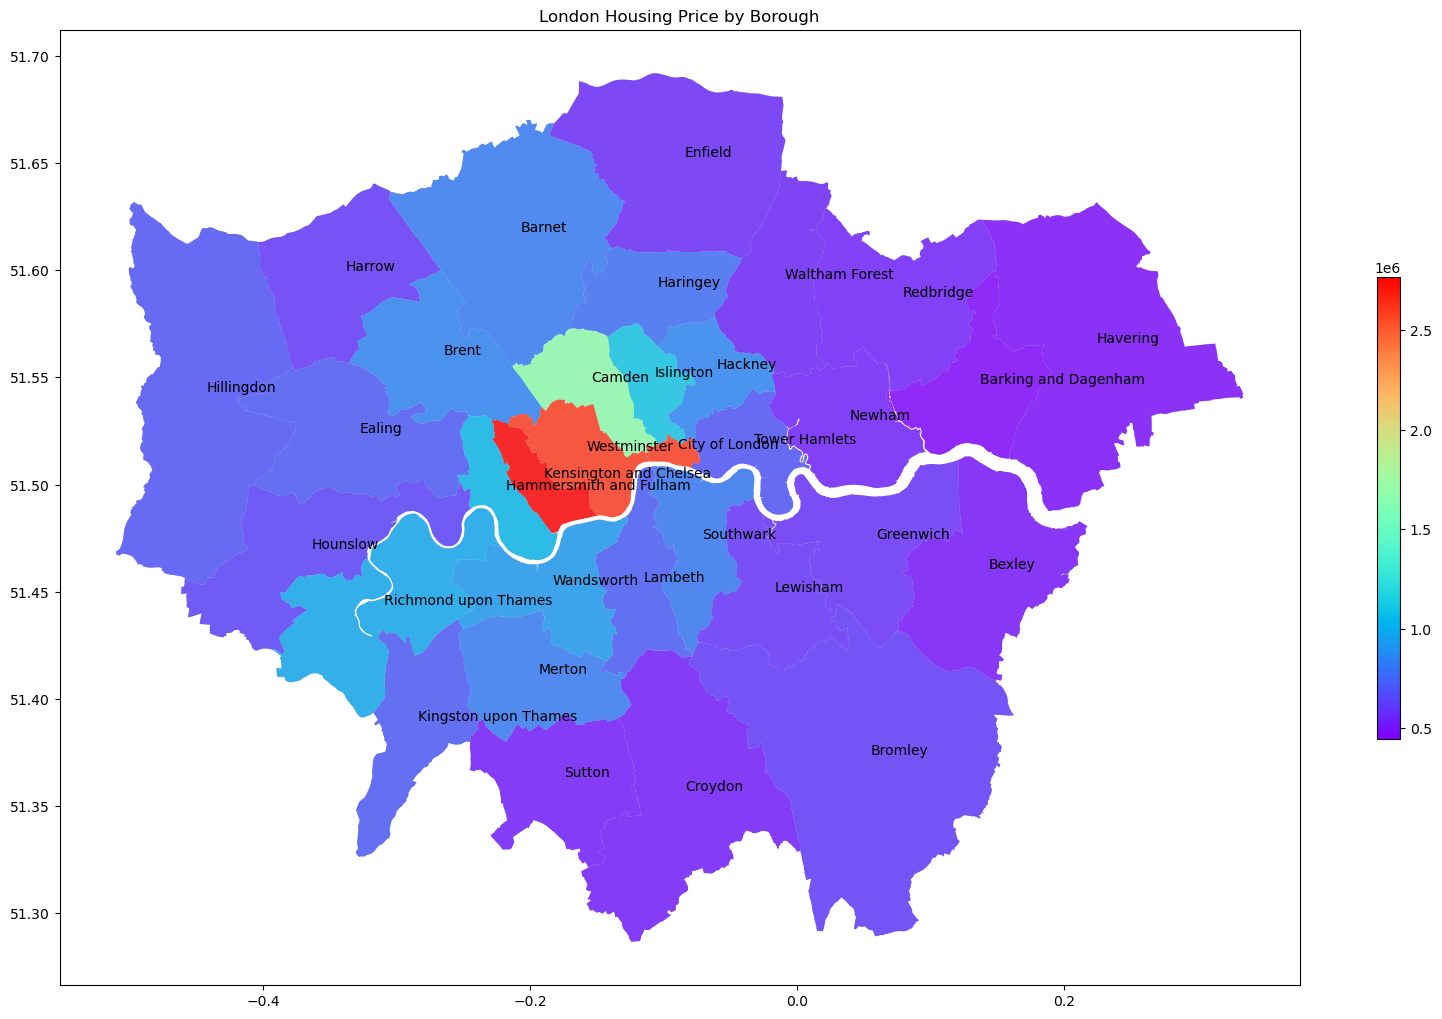

In [79]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the base map using GeoDataFrame gdf
gdf.plot(ax=ax, color='lightgrey')

# Overlay the boroughs with price_paid information using merged_df_shp
merged_df_shp.plot(column='price_paid', ax=ax, cmap='rainbow', legend=True, 
                   legend_kwds={'shrink': 0.3}, markersize=10, alpha=0.8)

# Set the title for the plot
ax.set_title('London Housing Price by Borough')

# Annotate each borough with its name
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points')

# Display the plot
plt.show()

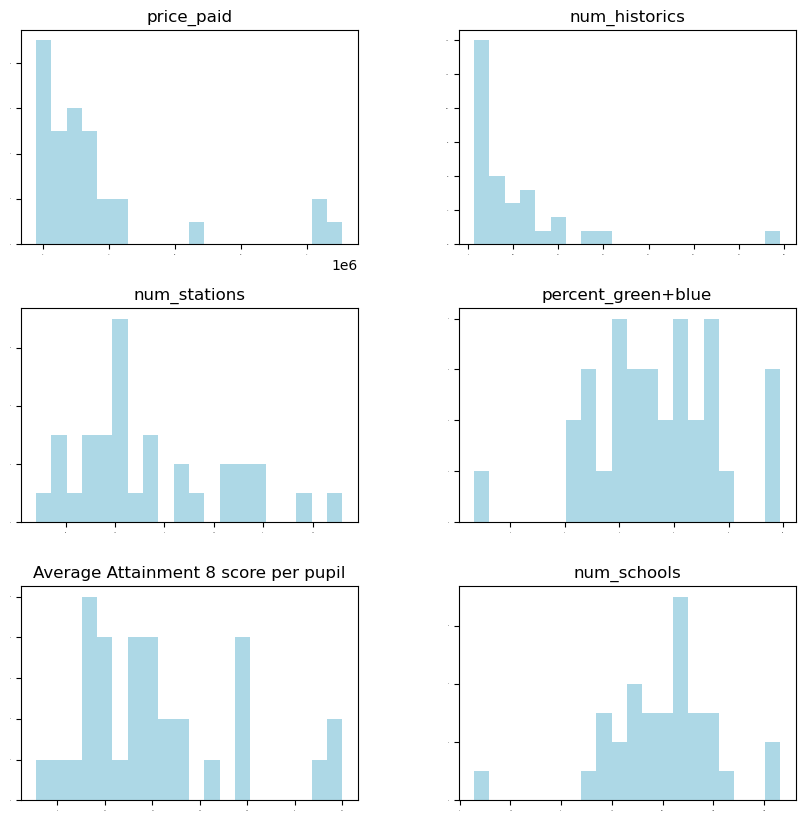

<Figure size 640x480 with 0 Axes>

In [82]:
# Plots distribution of X variables to check if these lend themselves to working well in the regression
merged_df_shp[['price_paid', 'num_historics', 'num_stations', 'percent_green+blue', 'Average Attainment 8 score per pupil', 'num_schools']].hist(bins=20, figsize=(10,10), color='lightblue', 
                                                                                                                                                 xlabelsize=0, ylabelsize=0, grid=False)
plt.show()

# Save the figure as a png
plt.savefig('Histogram1.png')

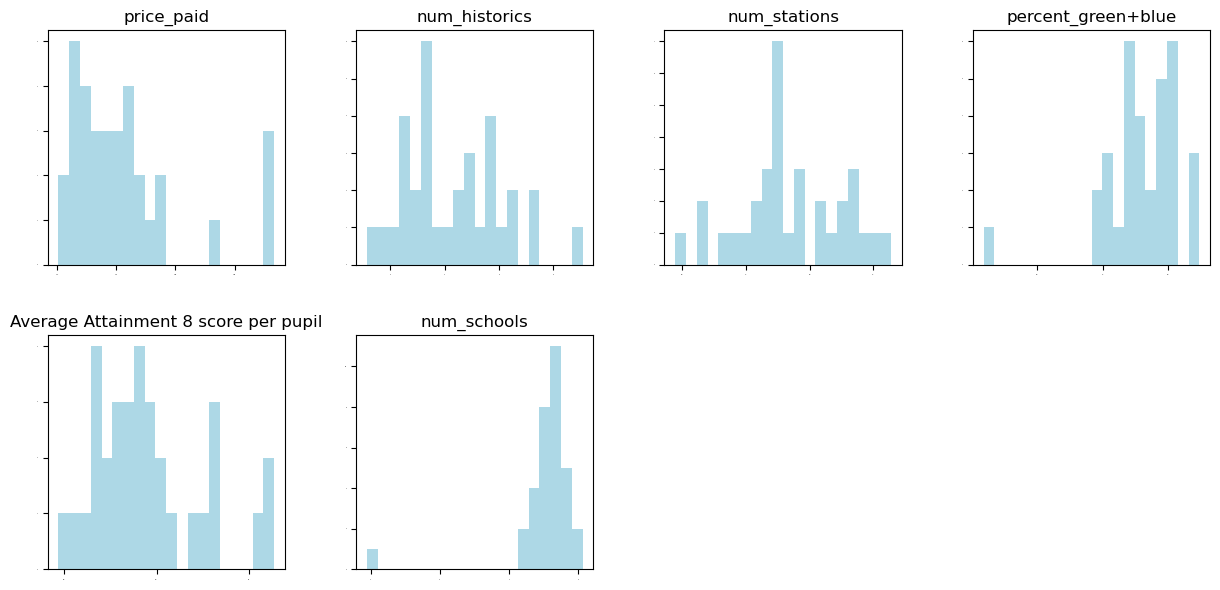

In [83]:
# Now plot again the variables after their log transformation
np.log(merged_df_shp[['price_paid', 'num_historics', 'num_stations', 'percent_green+blue', 'Average Attainment 8 score per pupil', 'num_schools']]).hist(bins=20,figsize=(15,7), color='lightblue', xlabelsize=0, ylabelsize=0, grid=False, layout=(2,4))
plt.show()

In [84]:
# Calculate the centroid of each geometry in the DataFrame
merged_df_shp['centro'] = merged_df_shp['geometry'].centroid

# Extract the X and Y coordinates from the centroids
merged_df_shp['X'] = merged_df_shp['centro'].x
merged_df_shp['Y'] = merged_df_shp['centro'].y

# Create a list of centroid coordinates as tuples (X, Y)
coords = list(zip(merged_df_shp['X'], merged_df_shp['Y']))

/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/3826443962.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_df_shp['centro'] = merged_df_shp['geometry'].centroid


In [104]:
# Convert DataFrame columns to numpy arrays for the dependent and independent variables
y = np.array(merged_df_shp['price_paid']).reshape((-1,1))
X1 = np.array(merged_df_shp['num_historics']).reshape((-1,1))
X2 = np.array(merged_df_shp['num_stations']).reshape((-1,1))
X3 = np.array(merged_df_shp['percent_green+blue']).reshape((-1,1))
X4 = np.array(merged_df_shp['Average Attainment 8 score per pupil']).reshape((-1,1))
X5 = np.array(merged_df_shp['num_schools']).reshape((-1,1))

# Stack the independent variable arrays horizontally to form the input matrix X
X = np.hstack([X1, X2, X3, X4, X5])

# Normalize the features in X and the target variable y to have zero mean and unit variance
X = (X-X.mean(axis = 0)) / X.std(axis = 0)
y = y.reshape((-1, 1))
y = (y - y.mean(axis = 0)) / y.std(axis = 0)

In [105]:
# Initialize the Sel_BW (bandwidth selection) class with coordinates, target variable, and features
sel = Sel_BW(coords, y, X)

# Manually set the bandwidth parameter to a specific value
bw_manual = 33  # Replace with your desired bandwidth value
sel.bw = bw_manual

In [106]:
# Add a constant term to the independent variables for the regression model
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     18.52
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           5.62e-08
Time:                        03:19:27   Log-Likelihood:                -22.268
No. Observations:                  33   AIC:                             56.54
Df Residuals:                      27   BIC:                             65.51
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.11e-16      0.091   1.21e-15      1.0

In [107]:
# Assume X is the feature matrix and y is the target variable
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Extract the residuals from the model
residuals_ols = model.resid
local_moran_ols = Moran_Local(residuals_ols, weights)
merged_df_shp['local_moran_ols'] = local_moran_ols.Is

/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/1152447402.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):


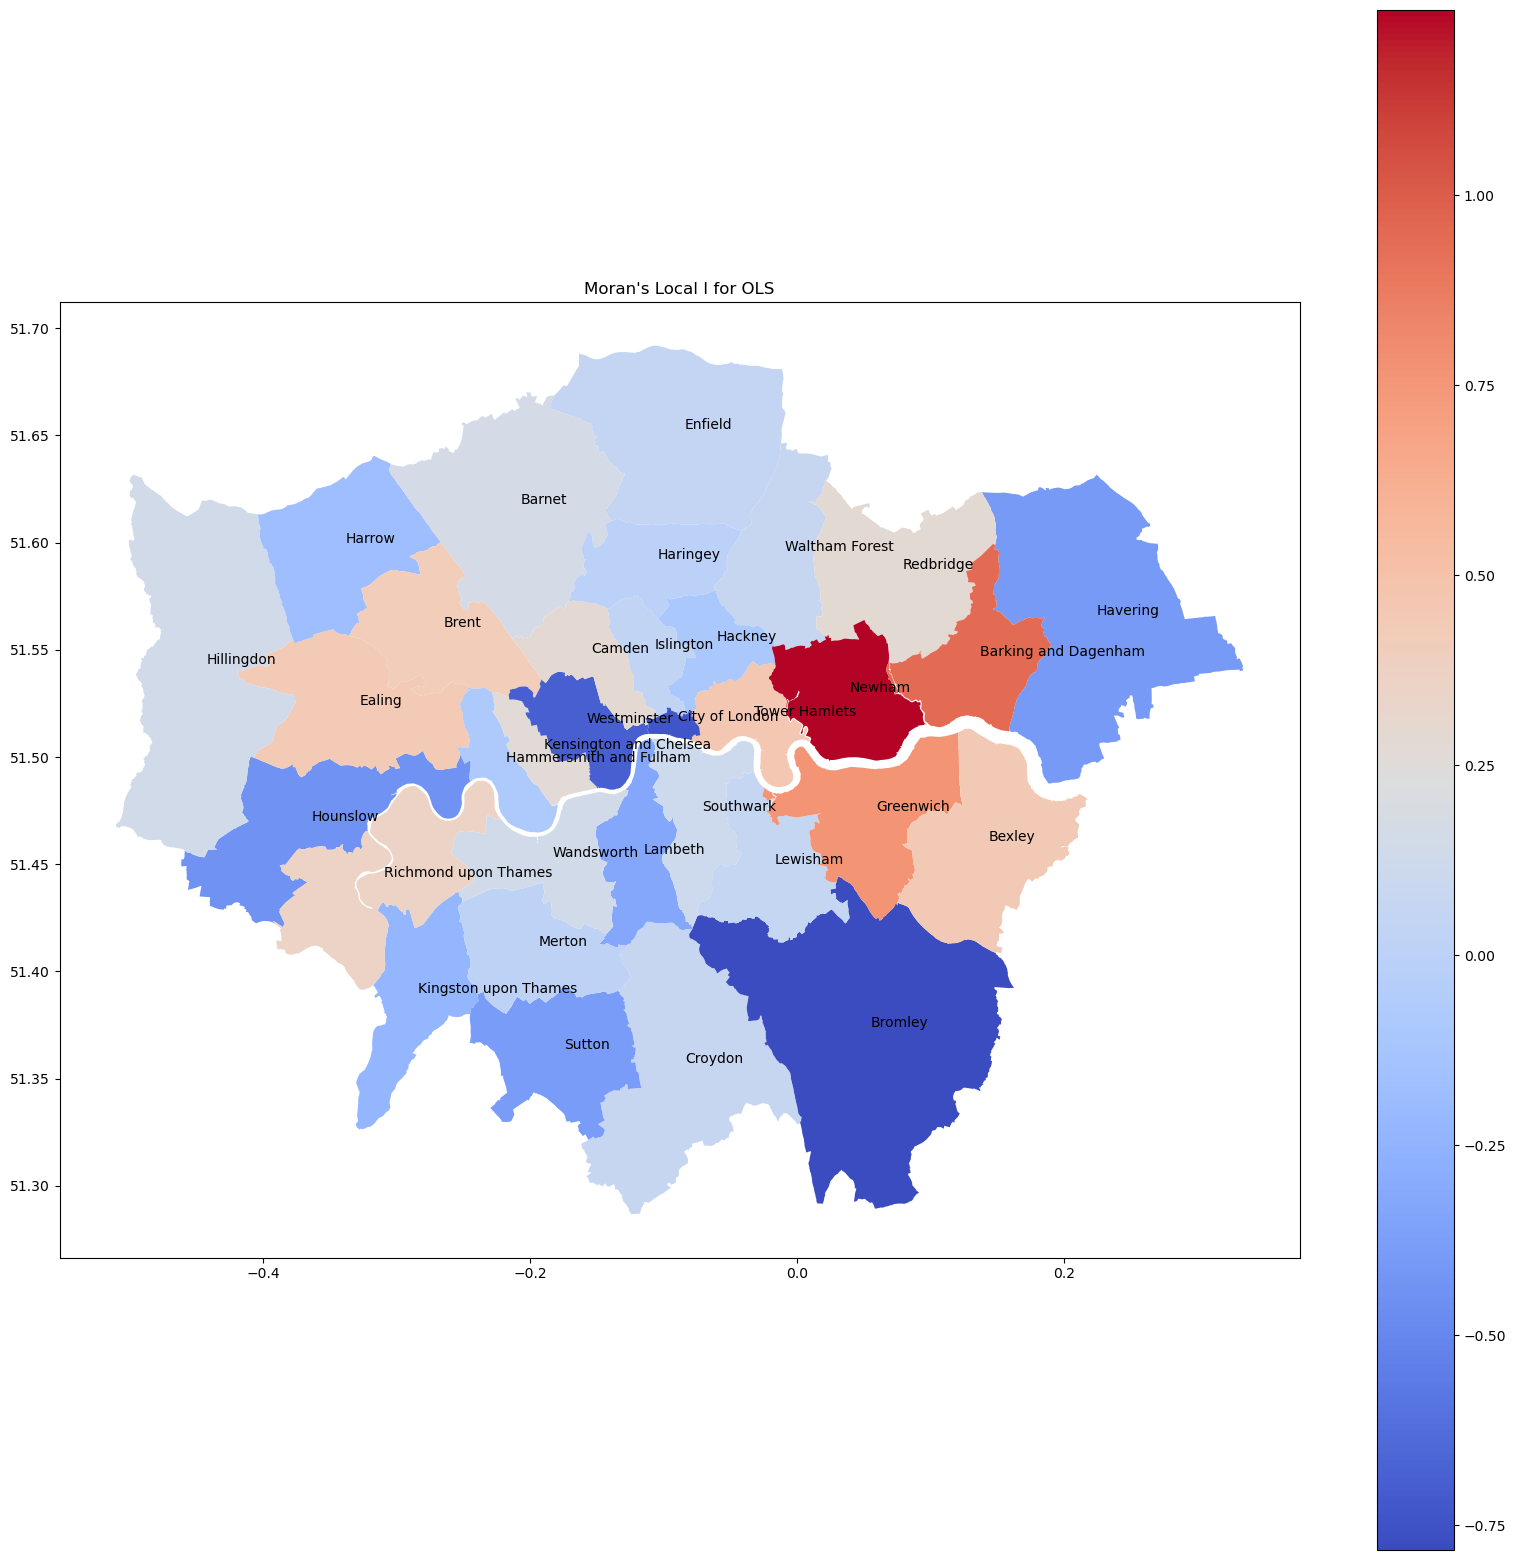

In [108]:
# Plot the residuals based on OLS
fig, ax = plt.subplots(figsize=(20, 20))
merged_df_shp.plot(column='local_moran_ols', cmap='coolwarm', ax=ax, legend=True)
plt.title("Moran's Local I for OLS")

for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points')

plt.show()

In [88]:
# Train GWR model
gwr = GWR(coords, y, X, bw=np.float64(bw_manual))
gwr_results = gwr.fit()

In [89]:
# The result of GWR model
gwr_results_summary = gwr_results.summary()
print(gwr_results_summary)

Model type                                                         Gaussian
Number of observations:                                                  33
Number of covariates:                                                     6

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              7.450
Log-likelihood:                                                     -22.268
AIC:                                                                 56.536
AICc:                                                                63.016
BIC:                                                                -86.956
R2:                                                                   0.774
Adj. R2:                                                              0.732

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

/Users/caiqinke/opt/anaconda3/envs/envGEOG0115/lib/python3.8/site-packages/spglm/iwls.py:111: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  betas = np.zeros((x.shape[1], 1), np.float)


/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/332613656.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):


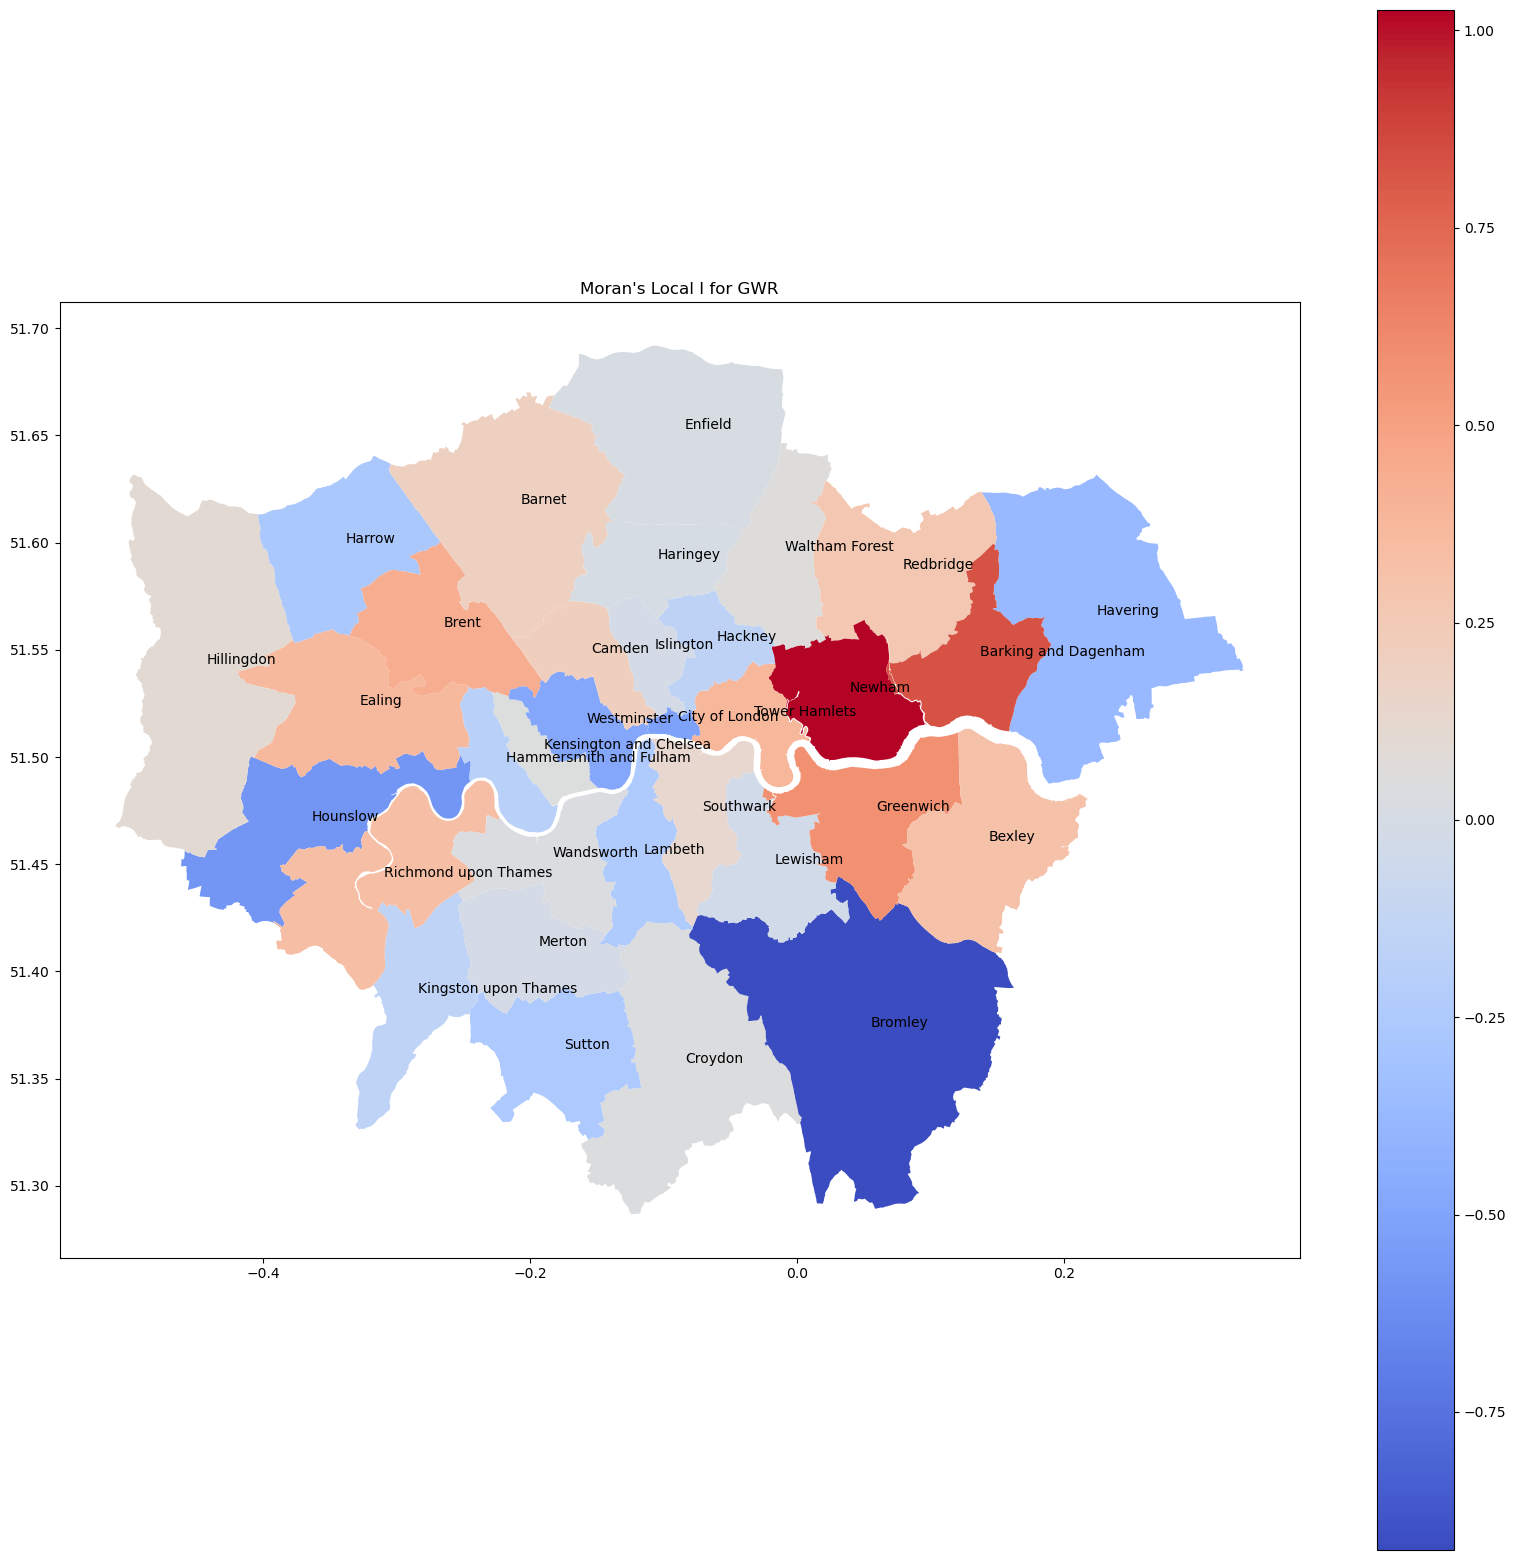

In [102]:
# Create a figure and axis object with a size of 20x20 units
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the GeoDataFrame 'merged_df_shp', coloring by the Local Moran's I values ('local_moran_gwr') and using the 'coolwarm' colormap
merged_df_shp.plot(column='local_moran_gwr', cmap='coolwarm', ax=ax, legend=True)

# Set the title of the plot
plt.title("Moran's Local I for GWR")

# Annotate the plot with borough names. The for loop goes through each centroid of the geometries in 'gdf',
# extracts the x and y coordinates, and uses them to place the name of each borough.
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points')

# Show the plot
plt.show()

In [109]:
print(residuals_ols)

[-0.27301269  0.30006273  0.52460969 -0.31027905  0.44218003  0.25556397
  0.48472625 -0.11506212  0.39273596  0.14239703 -0.32993764 -0.34862884
 -0.06819767 -0.56747006 -0.40190193  0.40973513 -0.25539574 -0.15717345
 -0.64141177  0.33186786  0.23079885  0.20785134 -0.07117112  1.41953807
 -0.50666229  0.3382218  -0.59881909  0.08515526 -0.35111989  0.05401165
 -0.7623526  -0.69256533  0.83170566]


In [110]:
print(residuals_gwr)

[-2.29929106e-01  2.75456291e-01  6.55898132e-01 -4.00936601e-01
  3.93309677e-01  2.54102930e-01  4.47805334e-01 -1.72151741e-01
  3.78785387e-01  1.55005483e-01 -3.17403886e-01 -3.30708636e-01
  3.95469872e-02 -5.03451564e-01 -3.65219851e-01  6.36988265e-01
 -2.36253449e-01 -1.47093627e-01 -5.87007820e-01  3.61699594e-01
  1.65817675e-01  6.38262561e-02 -1.63830345e-01  1.19626077e+00
 -4.50659173e-01  4.10449940e-01 -3.80126893e-01 -4.96027668e-02
 -4.22373966e-01 -1.09363867e-03 -6.02823808e-01 -6.71574921e-01
  5.21435726e-01]


In [111]:
print(merged_df_shp[['local_moran_gwr', 'local_moran_ols']])

    local_moran_gwr  local_moran_ols
0         -0.154680        -0.235912
1          0.041403         0.065538
2         -0.924955        -0.782276
3         -0.576749        -0.435113
4          0.368541         0.441437
5         -0.371281        -0.399449
6          0.099372         0.140450
7         -0.262948        -0.174958
8          0.432232         0.417794
9          0.201602         0.162206
10        -0.240035        -0.328004
11         0.134287         0.112247
12        -0.036949         0.058660
13         0.579874         0.763247
14         0.314793         0.445908
15         0.006564         0.054153
16         0.064697         0.067036
17         0.273266         0.284736
18        -0.257116        -0.391052
19         0.335693         0.363258
20        -0.011849         0.016985
21         0.034035         0.141852
22        -0.191458        -0.079652
23         0.043362         0.264470
24        -0.488167        -0.689716
25         0.215142         0.291257
2

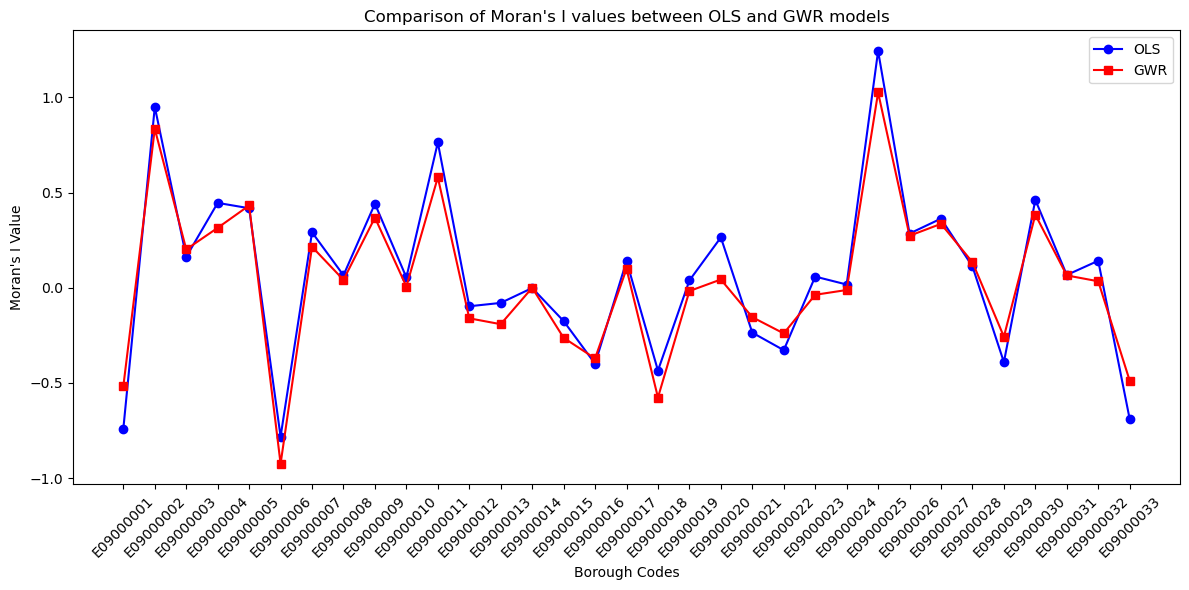

In [112]:
# Sort the DataFrame by Borough Codes
# Create an ordered list of Borough Codes ranging from E09000001 to E09000033
boroughs_order = ['E090000' + str(i).zfill(2) for i in range(1, 34)]

# Sort the DataFrame based on the ordered Borough Codes list
# Assuming the borough code column in the DataFrame is named 'GSS_CODE'
merged_df_shp_sorted = merged_df_shp.set_index('GSS_CODE').loc[boroughs_order].reset_index()

# Extract the required data
# Get the sorted list of Borough Codes
boroughs = merged_df_shp_sorted['GSS_CODE'].tolist()

# Get the list of Moran's I values calculated using OLS
moran_ols = merged_df_shp_sorted['local_moran_ols'].tolist()

# Get the list of Moran's I values calculated using GWR
moran_gwr = merged_df_shp_sorted['local_moran_gwr'].tolist()

# Plotting the data
# Initialize a plot with dimensions 12x6 inches
plt.figure(figsize=(12, 6))

# Plot Moran's I values for OLS with blue color and circle markers
plt.plot(boroughs, moran_ols, marker='o', label='OLS', color='blue')

# Plot Moran's I values for GWR with red color and square markers
plt.plot(boroughs, moran_gwr, marker='s', label='GWR', color='red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add x-axis and y-axis labels
plt.xlabel("Borough Codes")
plt.ylabel("Moran's I Value")

# Add title to the plot
plt.title("Comparison of Moran's I values between OLS and GWR models")

# Add legend to the plot
plt.legend()

# Ensure the layout fits well
plt.tight_layout()

# Display the plot
plt.show()

In [90]:
# Load the dataset for housing prices in the year 2019
df_2019_price = pd.read_csv('/Users/caiqinke/Desktop/Dissertation datasets/2019houseprice.csv')

# Remove rows where the 'postcode' value is missing (NaN) from the 2019 dataset
df_2019_price = df_2019_price.dropna(subset=['postcode'])

# Load the dataset for housing prices in the year 2020
df_2020_price = pd.read_csv('/Users/caiqinke/Desktop/Dissertation datasets/2020houseprice.csv')

# Remove rows where the 'postcode' value is missing (NaN) from the 2020 dataset
df_2020_price = df_2020_price.dropna(subset=['postcode'])

# Load the dataset for housing prices in the year 2021
df_2021_price = pd.read_csv('/Users/caiqinke/Desktop/Dissertation datasets/2021houseprice.csv')

# Remove rows where the 'postcode' value is missing (NaN) from the 2021 dataset
df_2021_price = df_2021_price.dropna(subset=['postcode'])

In [91]:
# Group the 2019 data by "district" and calculate the mean price
average_price_2019 = df_2019_price.groupby(['district'])['price_paid'].mean().reset_index()

# Remove extra spaces from all string columns
average_price_2019 = average_price_2019.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Group the 2020 data by "district" and calculate the mean price
average_price_2020 = df_2020_price.groupby(['district'])['price_paid'].mean().reset_index()

# Remove extra spaces from all string columns
average_price_2020 = average_price_2020.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Group the 2021 data by "district" and calculate the mean price
average_price_2021 = df_2021_price.groupby(['district'])['price_paid'].mean().reset_index()

# Remove extra spaces from all string columns
average_price_2021 = average_price_2021.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [92]:
code_name_mapping = {
    'CITY OF LONDON':'E09000001',
    'BARKING AND DAGENHAM':'E09000002',
    'BARNET':'E09000003',
    'BEXLEY':'E09000004',
    'BRENT':'E09000005',
    'BROMLEY':'E09000006',
    'CAMDEN':'E09000007',
    'CROYDON':'E09000008',
    'EALING':'E09000009',
    'ENFIELD':'E09000010',
    'GREENWICH':'E09000011',
    'HACKNEY':'E09000012',
    'HAMMERSMITH AND FULHAM':'E09000013',
    'HARINGEY':'E09000014',
    'HARROW':'E09000015',
    'HAVERING':'E09000016',
    'HILLINGDON':'E09000017',
    'HOUNSLOW':'E09000018',
    'ISLINGTON':'E09000019',
    'KENSINGTON AND CHELSEA':'E09000020',
    'KINGSTON UPON THAMES':'E09000021',
    'LAMBETH':'E09000022',
    'LEWISHAM':'E09000023',
    'MERTON':'E09000024',
    'NEWHAM':'E09000025',
    'REDBRIDGE':'E09000026',
    'RICHMOND UPON THAMES':'E09000027',
    'SOUTHWARK':'E09000028',
    'SUTTON':'E09000029',
    'TOWER HAMLETS':'E09000030',
    'WALTHAM FOREST':'E09000031',
    'WANDSWORTH':'E09000032',
    'CITY OF WESTMINSTER':'E09000033',
}

# Use the .map() method to create a new 'Code' column by mapping 'district' to its corresponding code
average_price_2019['Code'] = average_price_2019['district'].map(code_name_mapping)
average_price_2020['Code'] = average_price_2020['district'].map(code_name_mapping)
average_price_2021['Code'] = average_price_2021['district'].map(code_name_mapping)

In [93]:
# First, merge the data for 2019 and 2020
average_price = pd.merge(average_price_2019, average_price_2020[['district', 'price_paid']], on='district', suffixes=('_2019', '_2020'))

# Then, add the data for 2021
average_price = pd.merge(average_price, average_price_2021[['district', 'price_paid']], on='district')
average_price.rename(columns={'price_paid': 'price_paid_2021'}, inplace=True)

# Finally, add the data for 2022
average_price = pd.merge(average_price, average_price_2022[['district', 'price_paid']], on='district')
average_price.rename(columns={'price_paid': 'price_paid_2022'}, inplace=True)

In [94]:
# Assume there are 4 years of data
n_years = 4
current_year = 2022
years = np.array(range(current_year - n_years + 1, current_year + 1))

# Generate weights using an exponential decay function
lambda_decay = 0.8
weights = np.exp(-lambda_decay * (current_year - years))
n_boroughs = len(gdf)
time_weights_matrix = np.tile(weights, (n_boroughs, 1)).T 

In [95]:
# Extract house prices for each year
house_prices_2019 = average_price['price_paid_2019'].values
house_prices_2020 = average_price['price_paid_2020'].values
house_prices_2021 = average_price['price_paid_2021'].values
house_prices_2022 = average_price['price_paid_2022'].values

# Combine all the house price data into one array
house_prices = np.column_stack([house_prices_2019, house_prices_2020, house_prices_2021, house_prices_2022])

# Assuming we already have a time weights matrix 'time_weights_matrix'
# Adjust the house prices by multiplying with the time weights matrix
adjusted_prices = house_prices * time_weights_matrix.T

In [96]:
# Reshape 'num_historics' and 'percent_green+blue' to column vectors and horizontally stack them to create the independent variable array for GTWR
X1_gtwr = np.array(merged_df_shp['num_historics']).reshape((-1,1))
X2_gtwr = np.array(merged_df_shp['percent_green+blue']).reshape((-1,1))
X_gtwr = np.hstack([X1_gtwr, X2_gtwr])  # Note that we use X1_gtwr and X2_gtwr here, not X1 and X2

# Convert the coordinates to a numpy array
coords_array = np.array(coords)

# Repeat coordinates to match the temporal dimension (n_years)
# This is done because each location now has multiple observations over the years
repeated_coords = np.repeat(coords_array, n_years, axis=0)

# Create a time array that repeats the years for each coordinate
# Then flatten the array so it can be used in GTWR
t = np.tile(years, (coords_array.shape[0], 1)).flatten().reshape(-1, 1)

# Flatten house prices to become a 1D array
# This is done to match the shape of repeated_coords and t
y_gtwr = house_prices.flatten()
X_gtwr_repeated = np.repeat(X_gtwr, n_years, axis=0)

In [100]:
# Set bandwidth (bw) and decay parameter (tau)
bw = 33  # User-specified bandwidth
tau = 1.5  # Default tau value

# Fit the GTWR model
gtwr_results = GTWR(repeated_coords, t, X_gtwr_repeated, y_gtwr, bw, tau, kernel='gaussian', fixed=True).fit()

# Output R-squared: The proportion of the variance for the dependent variable that's explained by the independent variables
print("R-squared:", gtwr_results.R2)

# Calculate the number of observations
n = len(y_gtwr)

# Calculate the number of predictors, not including the intercept
k_gtwr = X_gtwr_repeated.shape[1] - 1  # Assuming X includes a constant term for the intercept

# Extract the R-squared value from the GTWR results
R2 = gtwr_results.R2

# Calculate the adjusted R-squared: This adjusts R2 for the number of predictors relative to the number of data points
adjusted_R2 = 1 - ((1 - R2) * (n - 1) / (n - k - 1))

# Output the adjusted R-squared value
print("Adjusted R-squared:", adjusted_R2)

R-squared: 0.04005742025525261
Adjusted R-squared: -0.02237786948424314


In [101]:
# Set the number of nearest neighbors for the spatial weight matrix
k_neighbors = 8

# Create a spatial weights matrix using k-nearest neighbors
weights = ps.lib.weights.KNN.from_dataframe(merged_df_shp, k=k_neighbors)

# Extract the residuals from the GWR (Geographically Weighted Regression) model fit
residuals_gwr = gwr_results.resid_response

# Compute the Local Moran's I statistic for the residuals to check for spatial autocorrelation
local_moran_gwr = Moran_Local(residuals_gwr, weights)
merged_df_shp['local_moran_gwr'] = local_moran_gwr.Is

In [114]:
# Calculate correlation matrix between all variables. Defaults to Pearson's r correlation
corr = merged_df_shp[['price_paid', 'num_historics', 'num_stations', 'percent_green+blue', 'Average Attainment 8 score per pupil', 'num_schools']].corr()

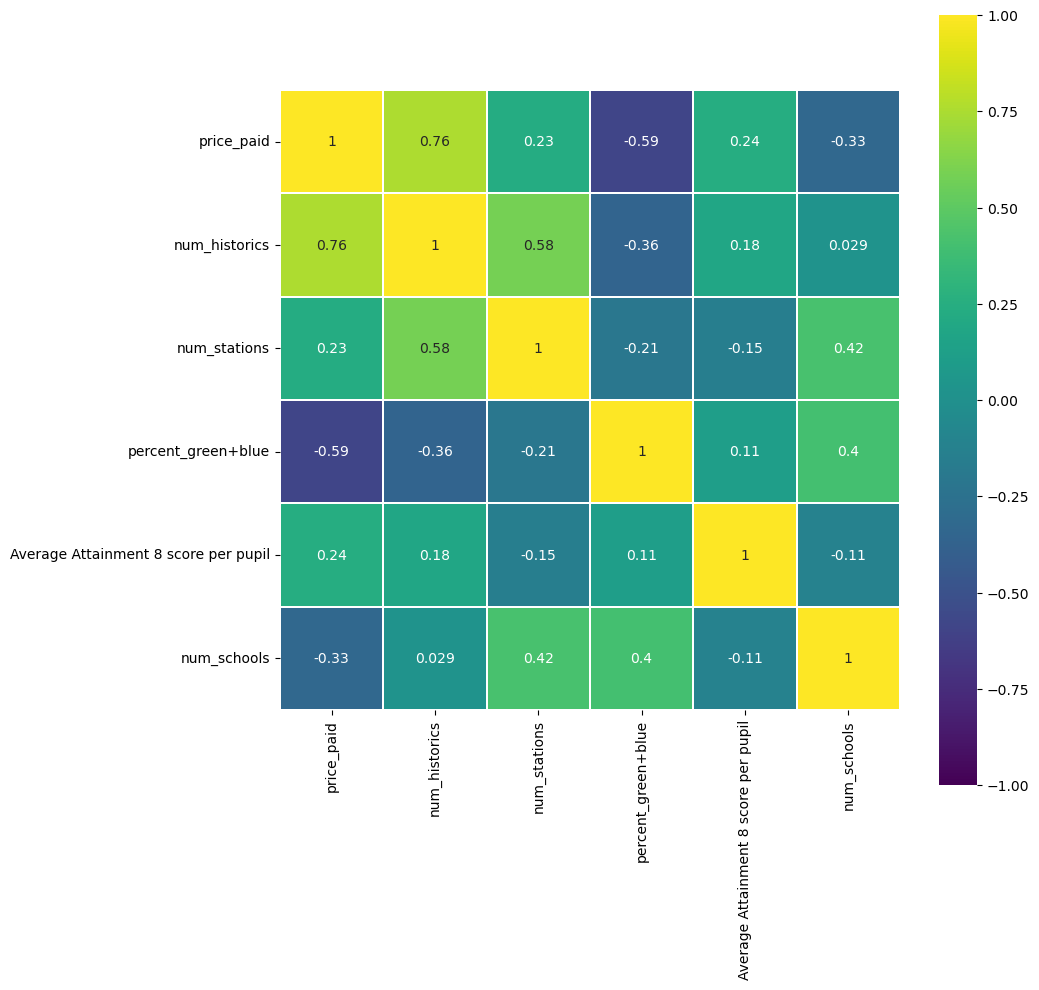

In [115]:
# Create a heatmap
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, 
            center=0,
            cmap=plt.get_cmap('viridis'),
            square=True, 
            linewidths=.05, 
            annot=True, 
            vmin=-1, 
            vmax=1,
            ax=ax)

# Display the heatmap
plt.show()

In [116]:
y_prices = np.log(merged_df_shp['price_paid'])
X_factors = np.log(merged_df_shp[['num_historics', 'percent_green+blue']])

(y_prices_train, y_prices_test, X_factors_train, X_factors_test) = train_test_split(y_prices, X_factors, train_size=0.7, random_state=1)

In [117]:
# Initialize a KFold object with 5 splits, shuffling enabled, and random state set to 0
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Define the rmse_cv function to evaluate the Root Mean Squared Error (RMSE) of a model using 5-fold Cross-Validation
def rmse_cv(model):
    # Create a KFold object with 5 splits, shuffling enabled and random state set to 0
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    
    # Run 5-fold Cross-Validation to get negative mean squared error
    # X_factors and y_prices should contain your features and target variable respectively
    cvs = cross_val_score(model, X_factors, y_prices, scoring="neg_mean_squared_error", cv=kf)
    
    # Print the cross-validation scores (they are negative due to how scikit-learn reports error)
    print("Cross-validation scores (negative MSE):", cvs)
    
    # Calculate RMSE from negative MSE and print it
    rmse = np.sqrt(-cvs)
    print("Root Mean Squared Error for each fold:", rmse)
    
    # Return the RMSE scores for each fold
    return rmse

In [118]:
# Define Linear Regression model (OLS)
lr_model=LinearRegression()

In [119]:
# Creating a Linear Regression Instance and fitting
lr_model.fit(X_factors_train, y_prices_train)

LinearRegression()

In [120]:
# Make predictions on the test set
price_predictions = lr_model.predict(X_factors_test)

# Calculate the R2 score
lin_R2 = r2_score(y_prices_test, price_predictions)
print("R2 Score:", lin_R2)

R2 Score: 0.4443311113647316


In [121]:
# Use the rmse_cv function to perform cross-validation and compute RMSE for the Linear Regression model (lr_model)
LR_rmse = rmse_cv(lr_model)

# Print the RMSE scores for each fold of cross-validation and their average
print("Cross-Validation RMSE Scores of Linear Regression:", LR_rmse)
print("Average RMSE of Linear Regression:", np.mean(LR_rmse))

Cross-validation scores (negative MSE): [-0.11169227 -0.12960415 -0.15852009 -0.04301739 -0.03487899]
Root Mean Squared Error for each fold: [0.33420394 0.36000576 0.39814582 0.20740635 0.18675917]
Cross-Validation RMSE Scores of Linear Regression: [0.33420394 0.36000576 0.39814582 0.20740635 0.18675917]
Average RMSE of Linear Regression: 0.29730420813581604


In [122]:
# Create a RandomForestRegressor model with 100 trees and a fixed random state for reproducibility
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_factors_train, y_prices_train)

# Use the fitted model to make predictions on the test set
y_pred = rf_model.predict(X_factors_test)

# Reverse the log transformation to get the actual predicted house prices
y_pred_actual = np.exp(y_pred)
y_actual = np.exp(y_prices_test)

# Calculate the R-squared (R2) score to evaluate the model's performance
r2 = r2_score(y_actual, y_pred_actual)

# Print the R-squared (R2) score
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.657665340183976


In [123]:
# Calculate rmse
RF_rmse = rmse_cv(rf_model)

print("Cross-Validation RMSE Scores of RF:", RF_rmse)
print("Average RMSE of RF:", np.mean(RF_rmse))

Cross-validation scores (negative MSE): [-0.11390126 -0.25120716 -0.07094386 -0.04324084 -0.07526156]
Root Mean Squared Error for each fold: [0.33749261 0.50120571 0.26635289 0.20794432 0.2743384 ]
Cross-Validation RMSE Scores of RF: [0.33749261 0.50120571 0.26635289 0.20794432 0.2743384 ]
Average RMSE of RF: 0.31746678445727


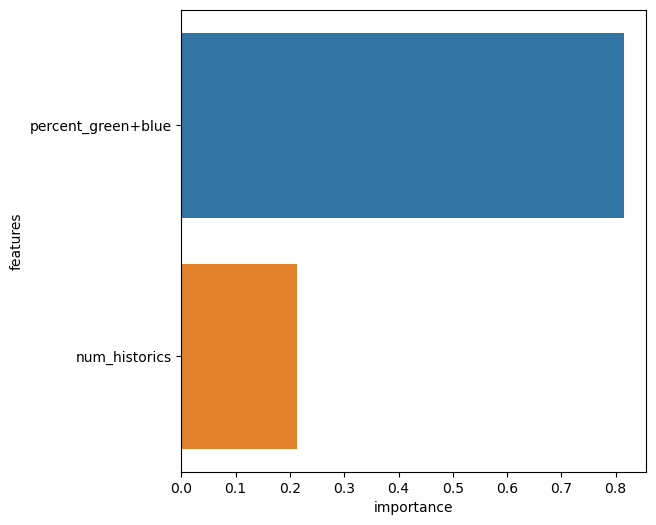

In [124]:
# Plot out feature importance for variables in descending order
coef = pd.DataFrame(lr_model.coef_, index = X_factors_train.columns)
coef = coef.reset_index()
coef.columns=['features','importance']
coef['importance']=np.abs(coef['importance'])
coef=coef.sort_values(by='importance',ascending=False)
plt.figure(figsize=(6,6))

sns.barplot(x='importance',y='features',data=coef,)
plt.show()

In [125]:
# Train a GBDT model
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.005,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state = 42)

GBoost.fit(X_factors_train, y_prices_train)

y_pred = GBoost.predict(X_factors_test)

r2 = r2_score(y_prices_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

R-squared (R2) Score: -0.13662004173525455


In [126]:
# Calculate rmse
GBDT_rmse = rmse_cv(GBoost)

print("Cross-Validation RMSE Scores of GBDT:", GBDT_rmse)
print("Average RMSE of GBDT:", np.mean(GBDT_rmse))

Cross-validation scores (negative MSE): [-0.37709055 -0.54215425 -0.16302983 -0.0601323  -0.09589455]
Root Mean Squared Error for each fold: [0.61407699 0.73631125 0.40376952 0.24521888 0.30966845]
Cross-Validation RMSE Scores of GBDT: [0.61407699 0.73631125 0.40376952 0.24521888 0.30966845]
Average RMSE of GBDT: 0.4618090184074819


In [127]:
# Train a LGBM model
model_lgb = lgb.LGBMRegressor(
    objective = 'regression', num_leaves = 5, 
    learning_rate = 0.05, n_estimators = 720, 
    max_bin = 55, bagging_fraction = 0.8, bagging_freq = 5, 
    feature_fraction = 0.2319, feature_fractions_seed = 9, 
    bagging_seed = 9, min_data_in_leaf = 6,min_sum_hessian_in_leaf = 11)

model_lgb.fit(X_factors_train, y_prices_train)

y_pred = model_lgb.predict(X_factors_test)

y_pred_actual = np.exp(y_pred)
y_actual = np.exp(y_prices_test)

r2 = r2_score(y_actual, y_pred_actual)

print("R-squared (R2) Score:", r2)

NameError: name 'lgb' is not defined

In [ ]:
# Calculate rmse
LGBM_rmse = rmse_cv(model_lgb)

print("Cross-Validation RMSE Scores of LGBM:", LGBM_rmse)
print("Average RMSE of LGBM:", np.mean(LGBM_rmse))

In [128]:
# Calculate the price predictions by random forest model
merged_df_shp['price_predictions'] = np.exp(rf_model.predict(X_factors))

/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/2403206197.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):


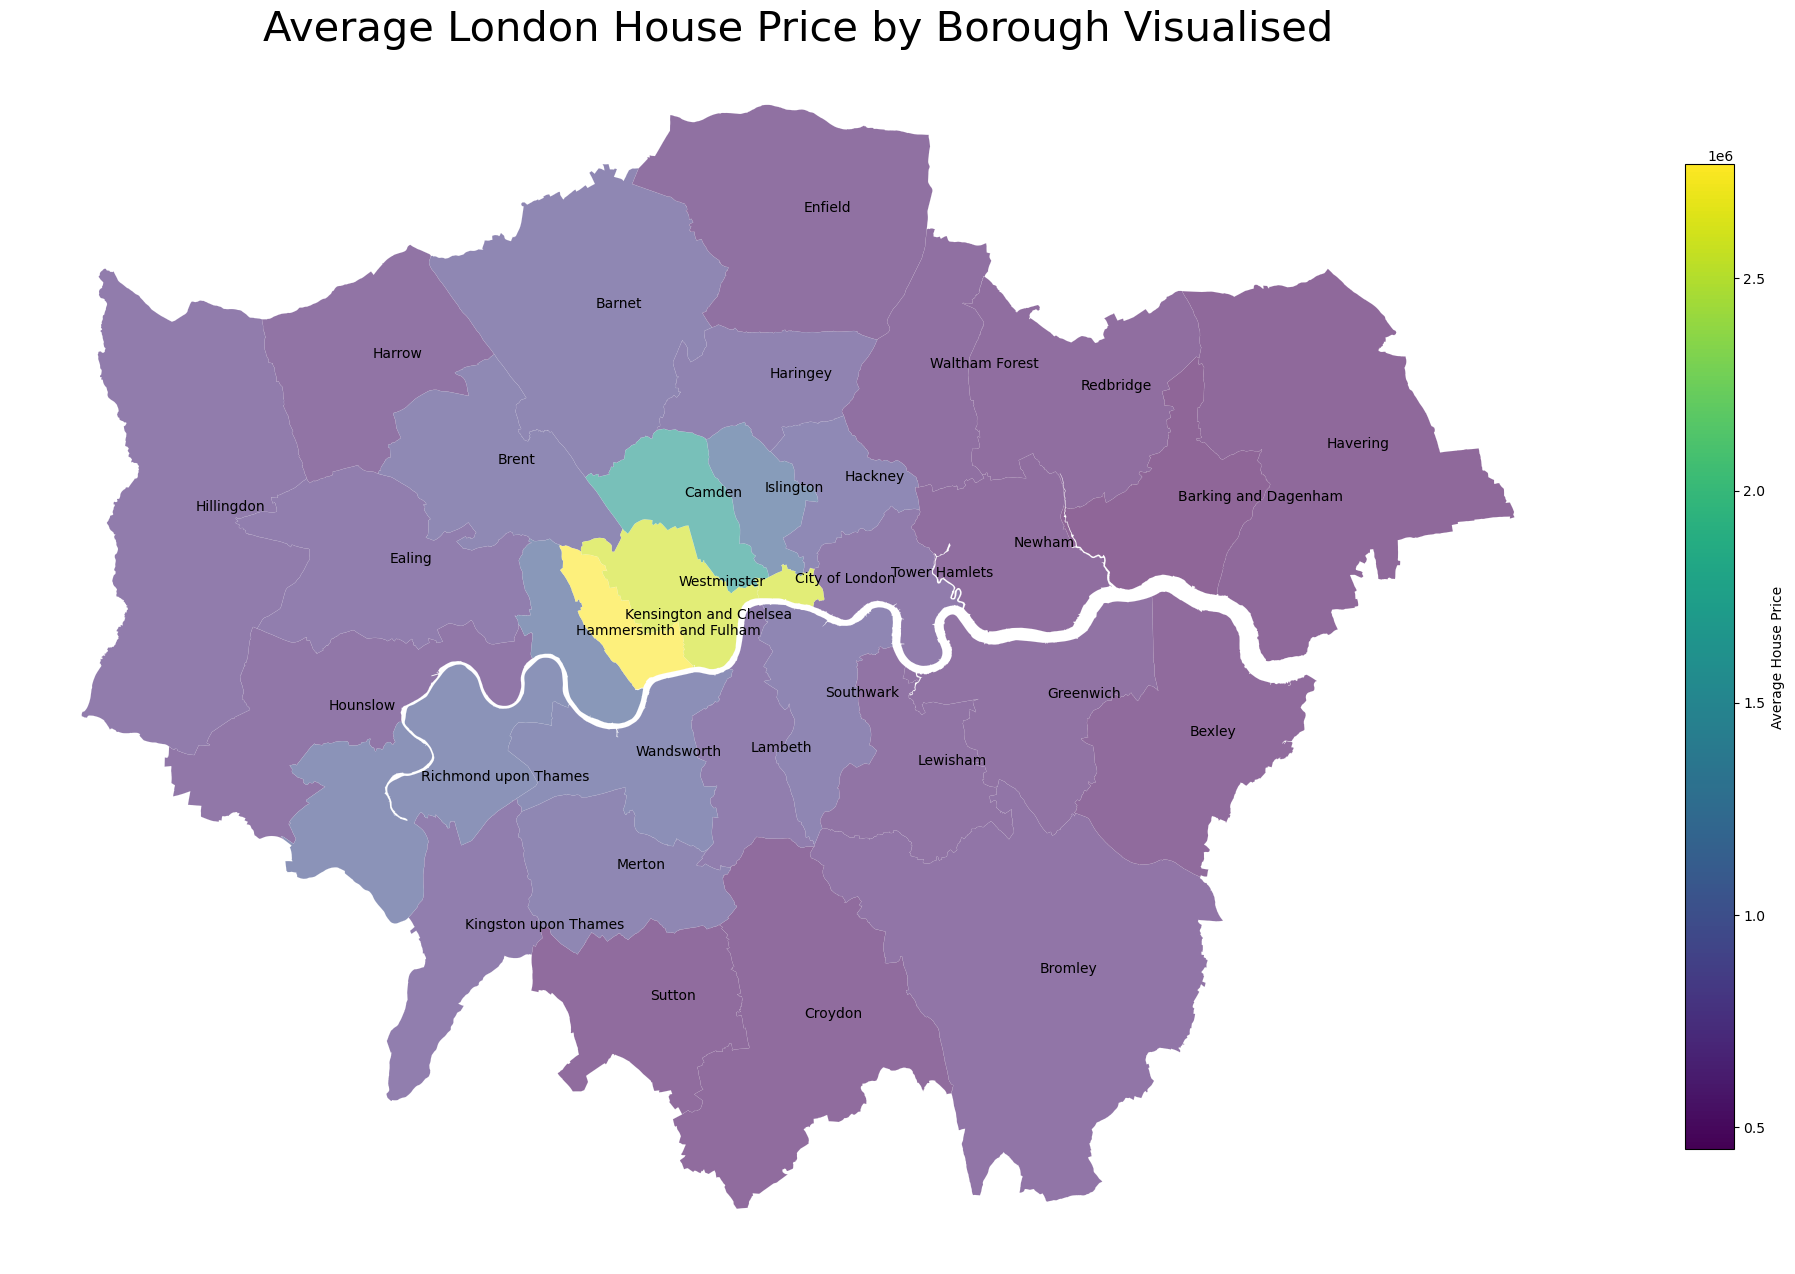

In [129]:
# Plot the Visualised London Housing Price
fig,ax = plt.subplots(1,1,figsize=[20,20])

myplot=merged_df_shp.plot(figsize=(20, 20), alpha=0.6, linewidth=0.1,
                edgecolor='w',ax=ax,
            column='price_paid',legend=True,
           legend_kwds={'label': "Average House Price",'shrink': 0.5})

for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points')

ax.set_title("Average London House Price by Borough Visualised",fontsize= 30)
ax.set_axis_off()
fig.tight_layout()

# Save the figure as a png
fig.savefig('AverageLondonHousePrice.png')

/var/folders/8k/05272y_d0qd8f9_mbcpr6l9h0000gn/T/ipykernel_3195/1558371770.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):


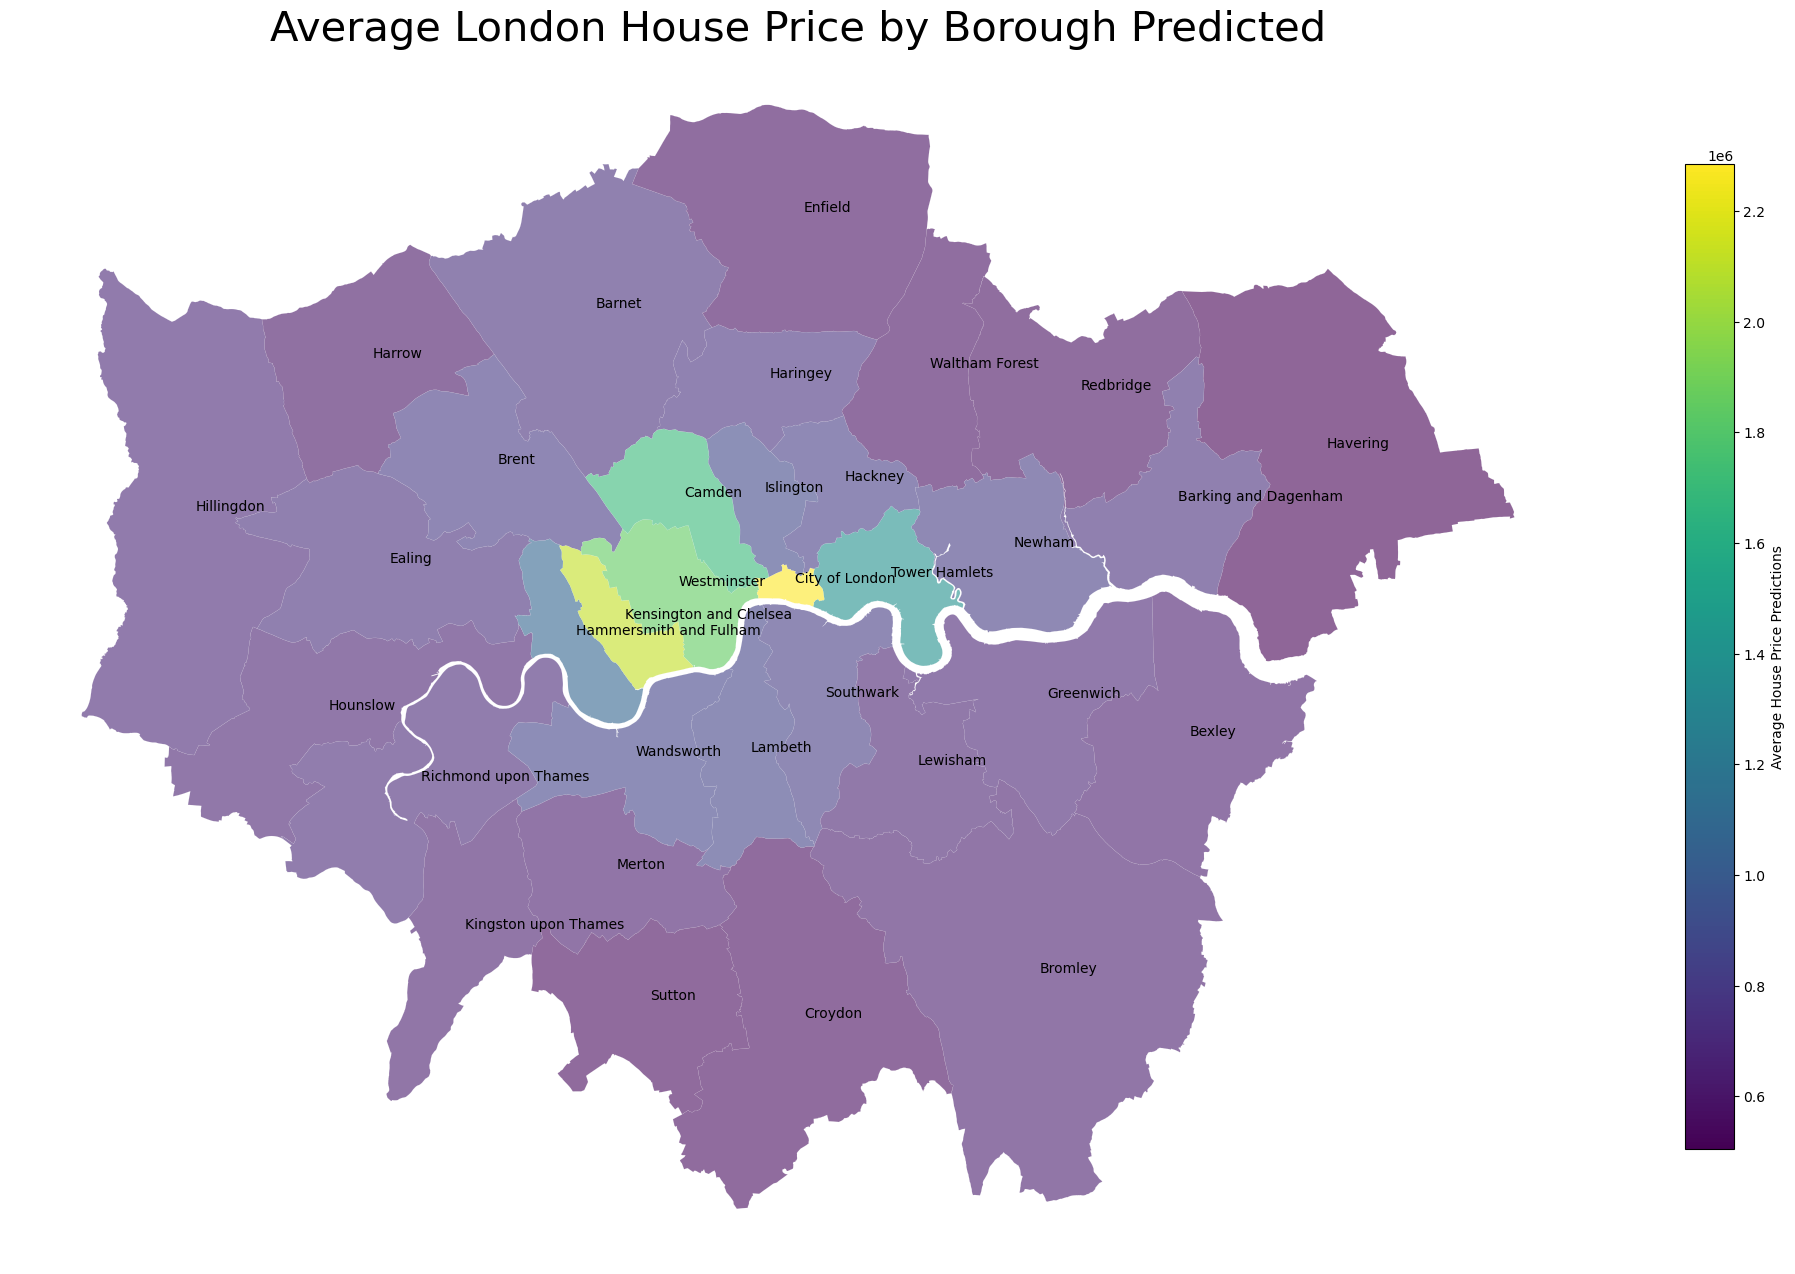

In [130]:
# Plot the Predicted London Housing Price
fig,ax = plt.subplots(1,1,figsize=[20,20])

myplot=merged_df_shp.plot(figsize=(20, 20), alpha=0.6, linewidth=0.1,
                edgecolor='w',ax=ax,
            column='price_predictions',legend=True,
           legend_kwds={'label': "Average House Price Predictions",'shrink': 0.5})

for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points')

ax.set_title("Average London House Price by Borough Predicted",fontsize= 30)
ax.set_axis_off()
fig.tight_layout()

# Save the figure as a png
fig.savefig('AverageLondonHousePricePredicted.png')